In [1]:
import pandas as pd
import numpy as np
from model import *
import extractor
class Extractor(extractor.AudioDataExtractionPipeline):
    pass

In [2]:
import pandas as pd
df = pd.read_csv("dataset/Data/features_30_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [3]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])  # Features: e.g., 'track' and 'statistics'
y = df['label']  # Target: 'label'

# Split the dataset while preserving class proportions
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    stratify=y,     # Preserve class proportions
    random_state=42 # For reproducibility
)

In [4]:
# Drop corrupted sample 
idx = X_train.index[X_train["filename"] == "jazz.00054.wav"]
X_train = X_train.drop(index=idx)
y_train = y_train.drop(index=idx)

In [5]:
model, acc = train_and_evaluate_catboost(
    X_eval.index.to_numpy(), 
    X_train.drop(columns=["filename", "length"]).to_numpy(), 
    X_eval.drop(columns=["filename", "length"]).to_numpy(), 
    y_train.to_numpy(), 
    y_eval.to_numpy()
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3648069	test: 0.3433333	best: 0.3433333 (0)	total: 60.7ms	remaining: 30.3s
50:	learn: 0.7367668	test: 0.6566667	best: 0.6700000 (47)	total: 181ms	remaining: 1.59s
100:	learn: 0.8211731	test: 0.7200000	best: 0.7233333 (98)	total: 296ms	remaining: 1.17s
150:	learn: 0.8726753	test: 0.7300000	best: 0.7400000 (122)	total: 410ms	remaining: 947ms
200:	learn: 0.9070100	test: 0.7366667	best: 0.7466667 (182)	total: 523ms	remaining: 778ms
250:	learn: 0.9313305	test: 0.7366667	best: 0.7533333 (218)	total: 637ms	remaining: 632ms
300:	learn: 0.9484979	test: 0.7533333	best: 0.7533333 (218)	total: 753ms	remaining: 498ms
350:	learn: 0.9670959	test: 0.7466667	best: 0.7600000 (318)	total: 865ms	remaining: 367ms
400:	learn: 0.9728183	test: 0.7466667	best: 0.7600000 (318)	total: 980ms	remaining: 242ms
450:	learn: 0.9756795	test: 0.7400000	best: 0.7600000 (318)	total: 1.1s	remaining: 120ms
499:	learn: 0.9842632	test: 0.7466667	best: 0.7600000 (318)	total: 1.23s	remaining: 0us

bestTest = 0.76
be

In [6]:
import soundfile as sf
import librosa
import numpy as np
from resampy import resample

In [7]:
E_train = Extractor(
    idx=[np.array([row[0]]) for row in X_train.iterrows()],
    x=[row[1].to_numpy() for row in X_train.iterrows()],
    y=[np.array([row]) for row in y_train],
    train=True
)
E_eval = Extractor(
    idx=[np.array([row[0]]) for row in X_eval.iterrows()],
    x=[row[1].to_numpy() for row in X_eval.iterrows()],
    y=[np.array([row]) for row in y_eval],
    train=False
)

def load_audio(x) -> [np.ndarray]:
    file_path = f"dataset/Data/genres_original/{x[0].split('.')[0]}/{x[0]}"
    y, sr = sf.read(file_path)
    if len(y.shape) == 2:  # Convert stereo to mono
        y = np.mean(y, dim=0)
    y = resample(y, sr, 16000)
    return y
Extractor.register_extractor('audio', load_audio)
E_train.full_extract()
E_eval.full_extract()

audio:   0%|          | 0/699 [00:00<?, ?it/s]

audio:   0%|          | 0/300 [00:00<?, ?it/s]

In [8]:
Extractor.register_extractor('stats', lambda x: x[2:])
Extractor.register_extractor('rms', lambda audio: np.array([np.sqrt(np.mean(audio**2))]))
E_train.soft_extract()
E_eval.soft_extract()

stats:   0%|          | 0/699 [00:00<?, ?it/s]

rms:   0%|          | 0/699 [00:00<?, ?it/s]

stats:   0%|          | 0/300 [00:00<?, ?it/s]

rms:   0%|          | 0/300 [00:00<?, ?it/s]

In [9]:
from librosa.sequence import viterbi

import numpy as np

def viterbi_dp(emission_probs, transition_matrix, p_init=None, eps=1e-15):
    """
    A custom Viterbi implementation that outputs:
      1) The DP table (log-domain) of best-path log-probs to each state/frame
      2) The state backpointer table
      3) A probability distribution over states at each time,
         obtained by exponentiating and normalizing the DP table
      4) The best-path state sequence from backtracking

    Parameters
    ----------
    emission_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability (linear scale) of emitting each state at each frame.
        We will take the log of these values for the DP.
    transition_matrix : np.ndarray [shape=(n_states, n_states)]
        Probability (linear scale) of transitioning from state i to state j.
    p_init : np.ndarray [shape=(n_states,)]
        Initial state distribution (linear probabilities).
        If None, defaults to uniform.
    eps : float
        Small constant to avoid log(0).

    Returns
    -------
    dp : np.ndarray [shape=(n_states, n_frames)]
        dp[s, t] = log-prob of the best path that ends in state s at time t
    backpointer : np.ndarray [shape=(n_states, n_frames)]
        backpointer[s, t] = index of the best predecessor state for s at t
    state_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability distribution over states for each frame
        (obtained via time-wise softmax of dp).
    best_path : np.ndarray [shape=(n_frames,)]
        The single best state for each frame (by Viterbi backtracking).
    """

    n_states, n_frames = emission_probs.shape

    if p_init is None:
        p_init = np.ones(n_states) / n_states

    # Convert input probabilities to log
    log_emit = np.log(emission_probs + eps)
    log_trans = np.log(transition_matrix + eps)
    log_init = np.log(p_init + eps)

    # Create storage
    dp = np.zeros((n_states, n_frames), dtype=np.float64)  # log of best path so far
    backpointer = np.zeros((n_states, n_frames), dtype=np.int32)

    # Initialization: time t=0
    dp[:, 0] = log_init + log_emit[:, 0]
    backpointer[:, 0] = 0  # no predecessor for the first frame

    # Forward pass
    for t in range(1, n_frames):
        for s in range(n_states):
            # Possible log-probs if we end in state s at time t
            candidates = dp[:, t-1] + log_trans[:, s]
            best_prev = np.argmax(candidates)
            dp[s, t] = candidates[best_prev] + log_emit[s, t]
            backpointer[s, t] = best_prev

    # Backtrack to find best path
    best_path = np.zeros(n_frames, dtype=np.int32)
    best_path[-1] = np.argmax(dp[:, -1])
    for t in range(n_frames - 2, -1, -1):
        best_path[t] = backpointer[best_path[t+1], t+1]

    # Convert dp to a per-frame probability distribution by exponentiating
    # and normalizing along the 'state' axis
    state_probs = np.zeros_like(dp, dtype=np.float64)
    for t in range(n_frames):
        # shift by max log-prob to avoid underflow
        row = dp[:, t]
        row_max = np.max(row)
        exp_row = np.exp(row - row_max)
        state_probs[:, t] = exp_row / np.sum(exp_row)

    return dp, backpointer, state_probs, best_path


def estimate_cqt_bin_viterbi(
    y,
    sr=22050,
    hop_length=512,
    n_bins=50,
    fmin=librosa.note_to_hz('C2'),
    silence_threshold=0.01,  # total energy below which we strongly favor silence
    stay_probability=0.9
):
    """
    Estimate the most likely CQT-bin sequence from an audio file, plus a
    special silence state. Use librosa's built-in Viterbi for smoothing.

    Parameters
    ----------
    audio_path : str
        Path to the audio file.
    sr : int
        Sample rate for loading the audio.
    hop_length : int
        Hop length for the CQT.
    n_bins : int
        Number of frequency bins in the CQT.
    fmin : float
        Minimum frequency for the CQT.
    silence_threshold : float
        Frames whose total energy is below this threshold are dominated by the silence state.
    stay_probability : float
        Probability of staying in the same state (bin or silence). The remainder
        is distributed across transitioning to all other states.

    Returns
    -------
    state_sequence : np.ndarray [shape=(n_frames,)]
        The best path of states (CQT bin indices plus one extra index for silence).
        Indices 0..(n_bins-1) correspond to actual bins; index n_bins is silence.
    path_log_probs : np.ndarray [shape=(n_frames,)]
        The log-probability of the best path up to (and including) each frame.
    emission_probs : np.ndarray [shape=(n_bins+1, n_frames)]
        The per-frame emission probability of each bin and the silence state.

    Notes
    -----
    - By default, `librosa.sequence.viterbi` expects probabilities in linear domain
      (non-log). We will manually compute the log-likelihood of the best path after
      we get the final state sequence.
    - The silence state (index = n_bins) has no direct column in the input,
      but we infer its emission probability by checking the total frame energy.
    """

    ################################################################
    # 1. Load audio and compute CQT magnitudes
    ################################################################
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, n_bins=n_bins, fmin=fmin)
    cqt_mag = np.abs(cqt)  # shape = (n_bins, n_frames)
    n_frames = cqt_mag.shape[1]

    ################################################################
    # 2. Build emission probability matrix (n_bins + 1 states)
    #    - last row is "silence"
    ################################################################
    n_states = n_bins + 1
    silence_idx = n_bins

    emission_probs = np.zeros((n_states, n_frames), dtype=np.float32)

    for t in range(n_frames):
        frame_energy = np.sum(cqt_mag[:, t])

        if frame_energy < silence_threshold:
            # If total energy is below threshold, strongly favor silence
            # and place a minimal probability on actual bins
            emission_probs[:n_bins, t] = 1e-10  # negligible
            emission_probs[silence_idx, t] = 1.0
        else:
            # Distribute across the bins proportionally, plus a small portion for silence
            emission_probs[:n_bins, t] = cqt_mag[:, t]

            # Example: give silence a small probability if frame is not silent
            # You can tune this constant or use a ratio
            emission_probs[silence_idx, t] = 1e-6

            # Normalize so sum of states = 1
            col_sum = np.sum(emission_probs[:, t])
            if col_sum > 0:
                emission_probs[:, t] /= col_sum
            else:
                # fallback if no energy
                emission_probs[silence_idx, t] = 1.0

    ################################################################
    # 3. Define a transition matrix for n_states = n_bins + 1
    #    We'll have:
    #      - High probability stay_probability to remain in the same state
    #      - The remainder distributed equally among all other states
    ################################################################
    transition_matrix = np.zeros((n_states, n_states), dtype=np.float32)
    # For each of the bin states
    for i in range(n_bins):
        transition_matrix[i, i] = stay_probability
        # The fraction to distribute among other states
        remain = (1.0 - stay_probability)
        # We'll give an equal fraction to the other n_states - 1
        transition_matrix[i, :] += remain / (n_states - 1)
        # But this double-counted staying in the same state; revert it to the intended stay_probability
        transition_matrix[i, i] = stay_probability

    # For the silence state
    transition_matrix[silence_idx, silence_idx] = stay_probability
    remain_sil = (1.0 - stay_probability)
    transition_matrix[silence_idx, :] += remain_sil / (n_states - 1)
    # revert the diagonal to stay_probability
    transition_matrix[silence_idx, silence_idx] = stay_probability

    # Normalize each row (should already be ~1.0, but let's be safe)
    for i in range(n_states):
        row_sum = np.sum(transition_matrix[i, :])
        if row_sum > 0:
            transition_matrix[i, :] /= row_sum

    ################################################################
    # 4. Run Viterbi via librosa
    ################################################################
    # librosa.sequence.viterbi expects:
    #    prob: shape=(n_states, n_steps) - each column is a probability distribution
    #    transition: shape=(n_states, n_states)
    # We can optionally specify p_init for initial distribution, e.g. uniform
    p_init = np.ones(n_states, dtype=np.float32) / n_states
    
    return viterbi_dp(emission_probs, transition_matrix, p_init=p_init)[2]


In [10]:
import librosa
import soundfile as sf
from resampy import resample
from tqdm.notebook import tqdm

def compute_cepstrum(audio, sr, n_fft=2048, hop_length=512):
    """
    Compute the cepstrum of an audio signal.

    Parameters:
    - audio (numpy array): The audio signal.
    - sr (int): Sampling rate of the audio signal.
    - n_fft (int): Number of FFT components. Default is 2048.
    - hop_length (int): Number of samples between successive frames. Default is 512.

    Returns:
    - cepstrum (numpy array): The computed cepstrum.
    """
    # Compute the magnitude spectrogram
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Convert to log scale
    log_spectrogram = np.log1p(spectrogram)

    # Compute the inverse FFT of the log-spectrogram
    cepstrum = np.fft.ifft(log_spectrogram, axis=0).real

    return cepstrum


def compute_cepstrum_over_cqt(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=84):
    """
    Compute the cepstrum over the CQT of an audio signal.

    Parameters:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate for the audio.
        hop_length (int): Hop length for the CQT computation.
        bins_per_octave (int): Number of bins per octave for CQT.
        n_bins (int): Number of total bins for CQT.

    Returns:
        cqt_cepstrum (np.ndarray): Cepstrum computed from the CQT.
    """
    # Compute the CQT of the signal
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins)

    # Compute the magnitude spectrum of the CQT
    magnitude = np.abs(cqt)

    # Compute the log of the magnitude
    log_magnitude = np.log1p(magnitude)  # log1p for numerical stability

    # Compute the cepstrum by applying IFFT to the log-magnitude spectrum
    cqt_cepstrum = np.fft.irfft(log_magnitude, axis=0)

    return cqt_cepstrum

sr = 16000
hop_length = 512
n_mfcc = 13
n_mels = 128
n_bins = 84
bins_per_octave = 12
fmin = librosa.note_to_hz("C1")


def mel(audio):
    # Calculate MelSpectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to decibel scale
    return mel_spectrogram

Extractor.register_extractor('mel', mel)
# Extractor.register_extractor('cepstrum', lambda audio: compute_cepstrum(audio, sr=sr))
# Extractor.register_extractor('chroma_cqt', lambda audio: librosa.feature.chroma_cqt(y=audio, sr=sr))
# Extractor.register_extractor('ccqt', lambda audio: compute_cepstrum_over_cqt(y=audio, sr=sr))
# Extractor.register_extractor('cqr_viterbi', lambda audio: estimate_cqt_bin_viterbi(y=audio, sr=sr))
Extractor.register_extractor('cqt', lambda audio: np.abs(librosa.cqt(audio, sr=sr, hop_length=hop_length, fmin=fmin, bins_per_octave=bins_per_octave, n_bins=n_bins)))
# Extractor.register_extractor('stft', lambda audio: librosa.stft(audio, hop_length=hop_length))
Extractor.register_extractor('mfcc', lambda audio: librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc))


In [11]:
E_train.soft_extract()
E_eval.soft_extract()

mel:   0%|          | 0/699 [00:00<?, ?it/s]

cqt:   0%|          | 0/699 [00:00<?, ?it/s]

mfcc:   0%|          | 0/699 [00:00<?, ?it/s]

mel:   0%|          | 0/300 [00:00<?, ?it/s]

cqt:   0%|          | 0/300 [00:00<?, ?it/s]

mfcc:   0%|          | 0/300 [00:00<?, ?it/s]

In [12]:
import matplotlib.pyplot as plt

In [13]:
hop_length=512
Extractor.register_extractor('bpm_beat', lambda audio: librosa.beat.beat_track(y=audio, sr=sr, hop_length=hop_length))
Extractor.register_extractor('bpm', lambda bpm_beat: bpm_beat[0])
Extractor.register_extractor('beat', lambda bpm_beat: bpm_beat[1])

In [14]:
E_train.soft_extract()
E_eval.soft_extract()

bpm_beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm:   0%|          | 0/699 [00:00<?, ?it/s]

beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm_beat:   0%|          | 0/300 [00:00<?, ?it/s]

bpm:   0%|          | 0/300 [00:00<?, ?it/s]

beat:   0%|          | 0/300 [00:00<?, ?it/s]

In [15]:
Extractor.register_extractor('cqt_hpss', lambda cqt: librosa.decompose.hpss(cqt))
Extractor.register_extractor('harmonic', lambda cqt_hpss: cqt_hpss[0])
Extractor.register_extractor('percussive', lambda cqt_hpss: cqt_hpss[1])

In [16]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_hpss:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic:   0%|          | 0/699 [00:00<?, ?it/s]

percussive:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_hpss:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic:   0%|          | 0/300 [00:00<?, ?it/s]

percussive:   0%|          | 0/300 [00:00<?, ?it/s]

(0.0, 30.0)

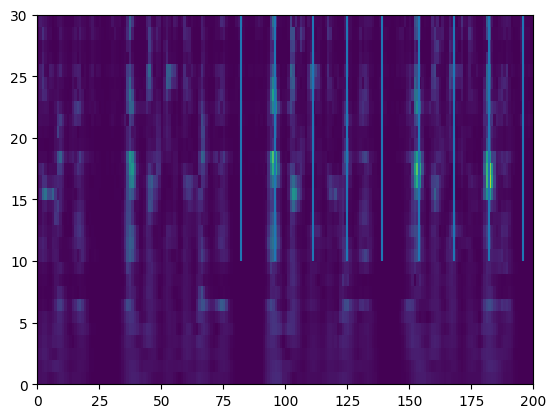

In [17]:
plt.pcolor(E_train.features['percussive'][0])
plt.vlines(E_train.features['beat'][0], 10, 30)
plt.xlim(0, 200)
plt.ylim(0, 30)

ChatGPT query

Write a python function with a following signature

```
rnd = np.random.default_rng(42)
def crop_by_beats(beat, harmony_specs, percussion_specs, frames_per_beat = 4, number_of_beats=16, number_of_samples=8)
    pass
```

beats is the integer array of frames at which there was a beat
upsample beats , for two neighboring values insert frames_per_beat-1 values between them uniformly cropped to the nearest frame

Next number_of_samples times sample starting position in the upsampled beats array and take number_of_beats * frames_per_beat consequent beats. Position must be sampled aligned to number_of_beats * frames_per_beat.

harmony_specs is a list of several spectrograms with harmonic parts of melody.
for each of harmony spec calculate the mean along time axis (axis = 1) between the consequent beats of the sample including the frames at which there was a beat

percussion_specs is a list of several spectrograms with percussion parts of melody. For each of percussion spec calculate the downsampled spectrogram as with harmony specs but shift the spectrogram so that the first sample was centered at the beat. The resulting length must be the same

return list of tuples containing downsampled spectrograms

In [18]:
rnd = np.random.default_rng(42)

def crop_by_beats(
    beat,
    harmony_specs,
    percussion_specs,
    frames_per_beat=4,
    number_of_beats=4,
    number_of_samples=8
):
    """
    Upsample the array of integer beat positions and then randomly extract 
    (number_of_samples) chunks of length (number_of_beats * frames_per_beat).
    
    For each chunk, compute the downsampled spectrogram:
      - For harmonic specs: take the mean along the time axis (axis=1) 
        between consecutive upsampled-beat boundaries.
      - For percussion specs: take the mean along the time axis over intervals 
        shifted so that each is centered at the corresponding upsampled beat.
    
    Parameters
    ----------
    beat : 1D array-like of int
        Array of frame indices at which a beat occurs. Must be strictly increasing.
    harmony_specs : list of np.ndarray
        Each element is a spectrogram for a harmonic component with shape 
        (freq_bins, time_frames).
    percussion_specs : list of np.ndarray
        Each element is a spectrogram for a percussion component with shape 
        (freq_bins, time_frames).
    frames_per_beat : int
        Number of subdivisions per original beat when upsampling.
    number_of_beats : int
        How many beats (in terms of upsampled subdivisions) to include in each chunk.
    number_of_samples : int
        How many random chunks to extract.
    
    Returns
    -------
    list of tuples
        A list (of length `number_of_samples`). Each element is:
        
            (harmony_downsampled_list, percussion_downsampled_list)
        
        where `harmony_downsampled_list` and `percussion_downsampled_list` are each 
        lists of spectrograms (in the same order as `harmony_specs` and 
        `percussion_specs`). Each downsampled spectrogram has shape:
        
            (freq_bins, number_of_beats * frames_per_beat)
    """
    
    # 1) Upsample 'beat' by inserting (frames_per_beat - 1) points 
    #    uniformly between each pair of consecutive beats.
    up_beats = []
    beat = np.array(beat, dtype=int)
    for i in range(len(beat) - 1):
        start = beat[i]
        end = beat[i + 1]
        diff = end - start
        
        # Insert frames_per_beat subdivisions between start and end, 
        # snapping to the nearest integer frame.
        for k in range(frames_per_beat):
            val = start + round(k * diff / frames_per_beat)
            # Avoid duplicates if rounding yields same as last appended
            if not up_beats or val != up_beats[-1]:
                up_beats.append(val)
    
    up_beats = np.array(up_beats, dtype=int)
    
    # 2) We need (number_of_beats * frames_per_beat + 1) upsampled-beat 
    #    positions for each chunk (the +1 is because we need the right boundary).
    needed_length = number_of_beats * frames_per_beat + 1
    total_upsampled = len(up_beats)
    
    # If we cannot extract even one chunk, return empty
    max_start = total_upsampled - needed_length
    if max_start < 0:
        return []
    
    # Possible start indices must be multiples of (number_of_beats * frames_per_beat)
    # so that each chunk is "aligned".
    stride = number_of_beats * frames_per_beat
    possible_starts = np.arange(0, max_start + 1, stride)
    
    # Randomly choose 'number_of_samples' start indices from these possibilities
    chosen_starts = rnd.choice(possible_starts, size=number_of_samples, replace=True)
    
    results = []
    for start_idx in chosen_starts:
        # Boundaries for this sample
        boundary_points = up_beats[start_idx : start_idx + needed_length]
        # === 3) Downsample each harmony spec ===
        harmony_downsampled = []
        harmony_sampled = []
        for spec in harmony_specs:
            # spec has shape (freq_bins, time_frames)
            freq_bins = spec.shape[0]
            
            # We'll get (number_of_beats * frames_per_beat) intervals
            ds_harm = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)
            for j in range(number_of_beats * frames_per_beat):
                left = boundary_points[j]
                right = boundary_points[j + 1]
                # Take the average along axis=1 (time axis)
                ds_harm[:, j] = spec[:, left:right].mean(axis=1)

            harmony_downsampled.append(ds_harm)
            harmony_sampled.append(spec[:,boundary_points[0]:boundary_points[-1]])
        
        # === 4) Downsample each percussion spec with centering ===
        percussion_downsampled = []
        percussion_sampled = []
        for spec in percussion_specs:
            
            freq_bins = spec.shape[0]
            ds_perc = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)

            first_left = None
            old_right = None
            for j in range(number_of_beats * frames_per_beat):
                dist = boundary_points[j + 1] - boundary_points[j]
                right = boundary_points[j + 1] - dist // 2
                if old_right is None:
                    left = boundary_points[j] - dist // 2
                    if left < 0:
                        left = 0
                    first_left = left
                else:
                    left = old_right
                old_right = right

                # Average over the time axis in [left, right)
                chunk = spec[:, left:right]
                ds_perc[:, j] = chunk.mean(axis=1)

            percussion_downsampled.append(ds_perc)
            percussion_sampled.append(spec[:,first_left:old_right])
        
        # One result entry = (list_of_downsampled_harmony_specs, list_of_downsampled_percussion_specs)
        results.append((harmony_downsampled, percussion_downsampled, harmony_sampled, percussion_sampled))
    return results

In [19]:
Extractor.register_extractor('sample', 
                             lambda beat, cqt, harmonic, mfcc, percussive: 
                             crop_by_beats(
                                 beat=beat, 
                                 harmony_specs=[cqt, harmonic, mfcc], 
                                 percussion_specs=[percussive]
                             ), shuffle=True, map_labels=[
                                 ('idx', 's_idx'), 
                                 ('y', 's_y'), 
                                 ('stats', 's_stats'), 
                                 ('bpm', 's_bpm'),
                                 ('rms', 's_rms')
                             ])
Extractor.register_extractor('ds_cqt', lambda sample: sample[0][0])
Extractor.register_extractor('ds_harmonic', lambda sample: sample[0][1])
Extractor.register_extractor('ds_mfcc', lambda sample: sample[0][2])
Extractor.register_extractor('ds_percussive', lambda sample: sample[1][0])
Extractor.register_extractor('s_cqt', lambda sample: sample[2][0])
Extractor.register_extractor('s_harmonic', lambda sample: sample[2][1])
Extractor.register_extractor('s_mfcc', lambda sample: sample[2][2])
Extractor.register_extractor('s_percussive', lambda sample: sample[3][0])

In [20]:
E_train.soft_extract()
E_eval.soft_extract()

sample:   0%|          | 0/699 [00:00<?, ?it/s]

ds_cqt:   0%|          | 0/5592 [00:00<?, ?it/s]

ds_harmonic:   0%|          | 0/5592 [00:00<?, ?it/s]

ds_mfcc:   0%|          | 0/5592 [00:00<?, ?it/s]

ds_percussive:   0%|          | 0/5592 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/5592 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/5592 [00:00<?, ?it/s]

s_mfcc:   0%|          | 0/5592 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/5592 [00:00<?, ?it/s]

sample:   0%|          | 0/300 [00:00<?, ?it/s]

ds_cqt:   0%|          | 0/2400 [00:00<?, ?it/s]

ds_harmonic:   0%|          | 0/2400 [00:00<?, ?it/s]

ds_mfcc:   0%|          | 0/2400 [00:00<?, ?it/s]

ds_percussive:   0%|          | 0/2400 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/2400 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/2400 [00:00<?, ?it/s]

s_mfcc:   0%|          | 0/2400 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/2400 [00:00<?, ?it/s]

In [21]:
Extractor.register_extractor('cqt_per_freq_stats', 
                             lambda s_cqt: np.hstack([s_cqt.mean(axis=1), s_cqt.var(axis=1)]))
Extractor.register_extractor('harmonic_per_freq_stats', 
                             lambda s_harmonic: np.hstack([s_harmonic.mean(axis=1), s_harmonic.var(axis=1)]))
Extractor.register_extractor('percussive_per_freq_stats', 
                             lambda s_percussive: np.hstack([s_percussive.mean(axis=1), s_percussive.var(axis=1)]))
Extractor.register_extractor('percussive_beat_frames', 
                             lambda ds_percussive: ds_percussive.mean(axis=0))

In [22]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_per_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_per_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_per_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_per_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_per_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_per_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/2400 [00:00<?, ?it/s]

In [23]:
features = ['cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats', 'percussive_beat_frames']
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0]
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2948856	test: 0.3000000	best: 0.3000000 (0)	total: 116ms	remaining: 57.7s
50:	learn: 0.6022890	test: 0.5291667	best: 0.5291667 (50)	total: 1.53s	remaining: 13.5s
100:	learn: 0.6945637	test: 0.5795833	best: 0.5795833 (100)	total: 2.89s	remaining: 11.4s
150:	learn: 0.7594778	test: 0.6012500	best: 0.6025000 (145)	total: 4.15s	remaining: 9.59s
200:	learn: 0.8006080	test: 0.6187500	best: 0.6187500 (200)	total: 5.53s	remaining: 8.22s
250:	learn: 0.8306509	test: 0.6354167	best: 0.6383333 (236)	total: 6.79s	remaining: 6.73s
300:	learn: 0.8512160	test: 0.6466667	best: 0.6470833 (298)	total: 8.05s	remaining: 5.32s
350:	learn: 0.8683834	test: 0.6470833	best: 0.6500000 (329)	total: 9.31s	remaining: 3.95s
400:	learn: 0.8875179	test: 0.6541667	best: 0.6541667 (377)	total: 10.7s	remaining: 2.65s
450:	learn: 0.8989628	test: 0.6650000	best: 0.6650000 (447)	total: 12s	remaining: 1.31s
499:	learn: 0.9116595	test: 0.6695833	best: 0.6704167 (492)	total: 13.3s	remaining: 0us

bestTest = 0.670416

In [24]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_stats_100,2.564481
percussive_per_freq_stats_13,1.620503
percussive_per_freq_stats_7,1.431737
percussive_per_freq_stats_105,1.380192
percussive_per_freq_stats_99,1.227396
percussive_per_freq_stats_111,1.148929
harmonic_per_freq_stats_27,1.085616
percussive_per_freq_stats_112,1.035897
harmonic_per_freq_stats_76,1.029314
percussive_per_freq_stats_107,1.015384


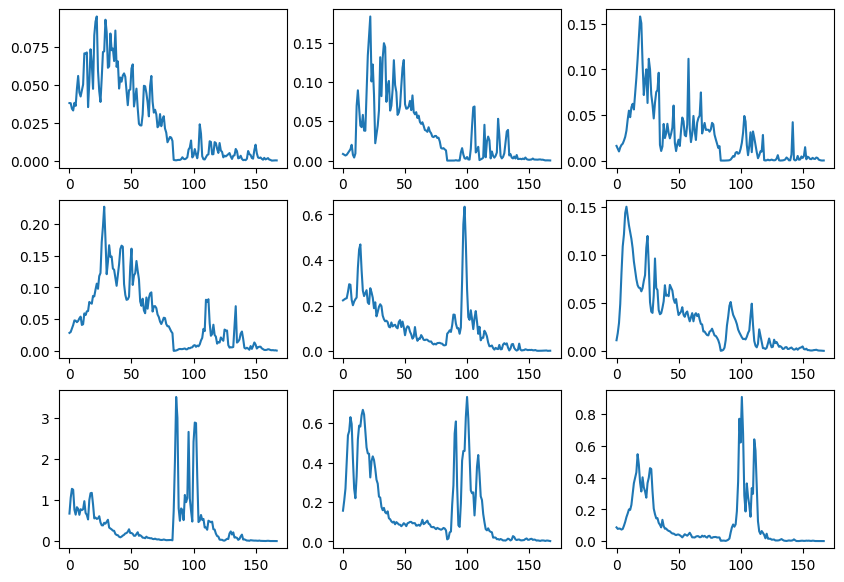

In [25]:
# It looks like the one of the most important features are high frequencies of drums, which is the last thing I expected. Lets check pictures:
s_y = E_train.get_features(['s_y'])[:, 0]
jazz_idx = np.where(s_y == 'jazz')[0][:3]
rock_idx = np.where(s_y == 'rock')[0][:3]
hip_hop_idx = np.where(s_y == 'hiphop')[0][:3]

plt.figure().set_size_inches(10, 7)
for pos, idx in enumerate(np.hstack([jazz_idx, rock_idx, hip_hop_idx])):
    plt.subplot(3, 3, pos + 1)
    plt.plot(E_train.features['percussive_per_freq_stats'][idx])

In [26]:
# Lets add BPM and RMS

features = ['s_rms', 's_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats', 'percussive_beat_frames']
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0]
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3206366	test: 0.3150000	best: 0.3150000 (0)	total: 93.3ms	remaining: 46.5s
50:	learn: 0.6251788	test: 0.5395833	best: 0.5395833 (50)	total: 1.46s	remaining: 12.9s
100:	learn: 0.7192418	test: 0.5887500	best: 0.5887500 (100)	total: 2.91s	remaining: 11.5s
150:	learn: 0.7787911	test: 0.6129167	best: 0.6141667 (143)	total: 4.62s	remaining: 10.7s
200:	learn: 0.8217096	test: 0.6308333	best: 0.6308333 (200)	total: 6.14s	remaining: 9.14s
250:	learn: 0.8447783	test: 0.6441667	best: 0.6441667 (248)	total: 7.48s	remaining: 7.42s
300:	learn: 0.8708870	test: 0.6537500	best: 0.6625000 (293)	total: 8.96s	remaining: 5.92s
350:	learn: 0.8885908	test: 0.6670833	best: 0.6679167 (349)	total: 10.5s	remaining: 4.47s
400:	learn: 0.8982475	test: 0.6729167	best: 0.6758333 (395)	total: 11.9s	remaining: 2.93s
450:	learn: 0.9111230	test: 0.6720833	best: 0.6758333 (395)	total: 13.3s	remaining: 1.44s
499:	learn: 0.9209585	test: 0.6800000	best: 0.6812500 (481)	total: 14.7s	remaining: 0us

bestTest = 0.681

In [27]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
s_rms_0,4.230305
s_bpm_0,4.185371
percussive_per_freq_stats_99,2.076061
cqt_per_freq_stats_92,1.985844
percussive_per_freq_stats_17,1.548966
percussive_per_freq_stats_106,1.418831
percussive_per_freq_stats_111,1.362312
percussive_per_freq_stats_97,1.253861
harmonic_per_freq_stats_83,1.237103
cqt_per_freq_stats_90,1.183914


Common to all splits features look more important to catboost (as they contain data about whole sample).
But we will calculate majority over samples, and using common features sploils the whole bagging idea.
Luckily it is possible to specify feature weights in catboost

In [28]:
# ChatGPT query:
#
# I have an array with feature names and I want to generate weights for the features. Some of the feature names look like <name>_<index>. 
# I want to make a function receiving a dict with prefixes and corresponding feature weights. 
# It should return the np.array of the same shape as feature_names, containing weights. 
# If the feature name starts with prefix from the dict then the weight has to be taken from the dict, otherwise it has to be 1. 
# Here is the signature:
# 
# def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, int]) -> np.ndarray:
#     pass

import numpy as np

def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, float]) -> np.ndarray:
    """
    Assign weights to features based on given prefixes.
    
    Parameters
    ----------
    feature_names : np.ndarray
        Array of feature names.
    weights : dict[str, float]
        Dictionary mapping a prefix (string) to a weight (float).
        
    Returns
    -------
    np.ndarray
        An array of the same shape as `feature_names` containing the assigned weights. 
        If a feature name starts with any prefix in `weights`, the corresponding weight 
        is used. Otherwise, the weight is 1.0.
    """
    result_weights = np.ones_like(feature_names, dtype=float)  # default is 1.0
    
    for i, fname in enumerate(feature_names):
        for prefix, w in weights.items():
            if fname.startswith(prefix):
                result_weights[i] = w
                break  # Stop at the first matching prefix

    return result_weights


In [29]:
features = ['s_rms', 's_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.7, s_bpm=0.7))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3206366	test: 0.3150000	best: 0.3150000 (0)	total: 64.2ms	remaining: 32.1s
50:	learn: 0.6264306	test: 0.5291667	best: 0.5291667 (50)	total: 1.56s	remaining: 13.8s
100:	learn: 0.7131617	test: 0.5929167	best: 0.5929167 (99)	total: 3.06s	remaining: 12.1s
150:	learn: 0.7702074	test: 0.6270833	best: 0.6279167 (143)	total: 4.6s	remaining: 10.6s
200:	learn: 0.8165236	test: 0.6412500	best: 0.6412500 (200)	total: 5.99s	remaining: 8.9s
250:	learn: 0.8437053	test: 0.6479167	best: 0.6512500 (249)	total: 7.35s	remaining: 7.29s
300:	learn: 0.8657010	test: 0.6666667	best: 0.6666667 (300)	total: 8.8s	remaining: 5.82s
350:	learn: 0.8794707	test: 0.6658333	best: 0.6691667 (311)	total: 10.2s	remaining: 4.33s
400:	learn: 0.8952074	test: 0.6733333	best: 0.6750000 (399)	total: 11.6s	remaining: 2.87s
450:	learn: 0.9071888	test: 0.6741667	best: 0.6770833 (427)	total: 13.1s	remaining: 1.42s
499:	learn: 0.9129113	test: 0.6770833	best: 0.6808333 (490)	total: 14.4s	remaining: 0us

bestTest = 0.6808333

In [30]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_stats_99,2.464929
cqt_per_freq_stats_92,1.930682
percussive_per_freq_stats_106,1.794833
s_bpm_0,1.708981
percussive_per_freq_stats_111,1.686279
percussive_per_freq_stats_17,1.673735
harmonic_per_freq_stats_83,1.611030
harmonic_per_freq_stats_79,1.180045
cqt_per_freq_stats_90,1.053917
harmonic_per_freq_stats_27,1.046490


In [31]:
# Lets add other stats

features = ['s_stats', 's_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_bpm=0.7, s_stats=0.68))

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2777182	test: 0.2950000	best: 0.2950000 (0)	total: 74.9ms	remaining: 37.4s
50:	learn: 0.7494635	test: 0.6520833	best: 0.6520833 (50)	total: 1.6s	remaining: 14.1s
100:	learn: 0.8460300	test: 0.7154167	best: 0.7154167 (100)	total: 3.25s	remaining: 12.8s
150:	learn: 0.9086195	test: 0.7525000	best: 0.7525000 (150)	total: 4.89s	remaining: 11.3s
200:	learn: 0.9424177	test: 0.7708333	best: 0.7725000 (183)	total: 6.52s	remaining: 9.71s
250:	learn: 0.9579757	test: 0.7766667	best: 0.7795833 (246)	total: 7.97s	remaining: 7.91s
300:	learn: 0.9719242	test: 0.7745833	best: 0.7800000 (261)	total: 9.41s	remaining: 6.22s
350:	learn: 0.9787196	test: 0.7779167	best: 0.7833333 (333)	total: 10.9s	remaining: 4.61s
400:	learn: 0.9831903	test: 0.7804167	best: 0.7833333 (333)	total: 12.3s	remaining: 3.03s
450:	learn: 0.9876609	test: 0.7841667	best: 0.7850000 (441)	total: 13.7s	remaining: 1.49s
499:	learn: 0.9917740	test: 0.7908333	best: 0.7929167 (490)	total: 15.1s	remaining: 0us

bestTest = 0.7929

In [32]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[8:]) if x.startswith('s_stats') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
s_stats_23,4.652605,mfcc4_mean
s_stats_26,4.469790,mfcc5_var
s_stats_0,2.956316,chroma_stft_mean
s_stats_12,2.438819,harmony_mean
s_stats_5,2.156590,spectral_centroid_var
s_stats_33,2.083765,mfcc9_mean
s_stats_1,1.690109,chroma_stft_var
s_stats_9,1.636079,rolloff_var
s_stats_49,1.592774,mfcc17_mean
s_stats_36,1.581852,mfcc10_var


TODO: translate to English
1. Высокий вес у mfcc - это преобразование Фурье посчитанное поверх mel спектрограммы.
Эта операция выполняет 2 цели, понижает размерность, и позволяет оценить фундаментальную частоту
2. Высокий вес у статистик над хроматическими фичами (то есть какая нота встречается чаще)
3. Высокий вес у статистик спектрального центроида

Вывод: Надо добавить эти фичи, только посчитанные на кусочке

In [33]:
Extractor.register_extractor('mfcc_quef_stats', 
                             lambda s_mfcc: np.hstack([s_mfcc.mean(axis=1), s_mfcc.var(axis=1)]))

# Usually STFT is used for spectral centroid, but I will use CQT, it may turn out to be even more precise.
cqt_frequencies = librosa.cqt_frequencies(n_bins=n_bins, fmin=fmin, bins_per_octave=bins_per_octave)
Extractor.register_extractor('cqt_spectral_centroid', 
                             lambda s_cqt: np.sum(cqt_frequencies.reshape(-1, 1) * librosa.util.normalize(s_cqt, norm=1, axis=-2), axis=0))

Extractor.register_extractor('cqt_spectral_centroid_stats', 
                             lambda cqt_spectral_centroid: np.array([cqt_spectral_centroid.mean(), cqt_spectral_centroid.var()]))

chroma_map = librosa.filters.cq_to_chroma(cqt_frequencies.shape[0], bins_per_octave=bins_per_octave, n_chroma=bins_per_octave, fmin=fmin)
Extractor.register_extractor('cqt_chroma', 
                             lambda s_cqt: np.dot(chroma_map, s_cqt))
Extractor.register_extractor('cqt_chroma_stats', 
                             lambda cqt_chroma: np.hstack([cqt_chroma.mean(axis=1), cqt_chroma.var(axis=1)]))

Extractor.register_extractor('harmonic_chroma', 
                             lambda s_harmonic: np.dot(chroma_map, s_harmonic))
Extractor.register_extractor('harmonic_chroma_stats', 
                             lambda harmonic_chroma: np.hstack([harmonic_chroma.mean(axis=1), harmonic_chroma.var(axis=1)]))


In [34]:
E_train.soft_extract()
E_eval.soft_extract()

mfcc_quef_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_spectral_centroid:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_spectral_centroid_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_chroma:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_chroma_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_chroma:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_chroma_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

mfcc_quef_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_spectral_centroid:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_spectral_centroid_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_chroma:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_chroma_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_chroma:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_chroma_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

In [35]:
# Lets add MFCC, chromatic features and centroid

features = ['s_rms', 's_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats', 'percussive_beat_frames',
           'cqt_spectral_centroid_stats', 'cqt_chroma_stats', 'harmonic_chroma_stats', 'mfcc_quef_stats']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2832618	test: 0.2991667	best: 0.2991667 (0)	total: 75.9ms	remaining: 37.9s
50:	learn: 0.6276824	test: 0.5516667	best: 0.5516667 (50)	total: 1.81s	remaining: 16s
100:	learn: 0.7237124	test: 0.5941667	best: 0.5958333 (97)	total: 3.52s	remaining: 13.9s
150:	learn: 0.7893419	test: 0.6412500	best: 0.6425000 (148)	total: 5.12s	remaining: 11.8s
200:	learn: 0.8297568	test: 0.6641667	best: 0.6654167 (192)	total: 6.74s	remaining: 10s
250:	learn: 0.8608727	test: 0.6829167	best: 0.6829167 (250)	total: 8.21s	remaining: 8.14s
300:	learn: 0.8828684	test: 0.6841667	best: 0.6862500 (296)	total: 9.81s	remaining: 6.48s
350:	learn: 0.8961016	test: 0.6904167	best: 0.6941667 (316)	total: 11.4s	remaining: 4.86s
400:	learn: 0.9089771	test: 0.6929167	best: 0.6950000 (369)	total: 13s	remaining: 3.22s
450:	learn: 0.9209585	test: 0.6945833	best: 0.6970833 (443)	total: 14.5s	remaining: 1.58s
499:	learn: 0.9297210	test: 0.6975000	best: 0.7004167 (490)	total: 16s	remaining: 0us

bestTest = 0.7004166667
b

In [36]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_stats_111,1.606271
cqt_spectral_centroid_stats_1,1.415336
s_bpm_0,1.408323
mfcc_quef_stats_17,1.372605
percussive_per_freq_stats_16,1.331305
mfcc_quef_stats_18,1.204908
mfcc_quef_stats_3,1.199661
mfcc_quef_stats_15,1.111819
mfcc_quef_stats_16,1.082643
percussive_per_freq_stats_96,1.043127


In [37]:
# Lets leave out only features that turn out important. Boosting is not robust to autocorrelation. 
# There is of course a penalty in CatBoost, but still it makes sense.
imp = pd.DataFrame(data=np.stack([E_train.get_feature_names_vector(features)]).T, columns=['feature_name'])
imp['importance'] = model.feature_importances_
imp['cropped_feature_name'] = imp['feature_name'].apply(lambda x: '_'.join(x.split('_')[:-1]))
imp[['cropped_feature_name', 'importance']].groupby('cropped_feature_name').agg(['max', 'mean']).sort_values(('importance', 'max'), ascending=False)

importance          
                                   max      mean
cropped_feature_name                            
percussive_per_freq_stats     1.606271  0.177994
cqt_spectral_centroid_stats   1.415336  0.898776
s_bpm                         1.408323  1.408323
mfcc_quef_stats               1.372605  0.464576
harmonic_per_freq_stats       1.032677  0.176651
percussive_beat_frames        0.878368  0.288431
cqt_per_freq_stats            0.637291  0.103591
harmonic_chroma_stats         0.308306  0.079228
cqt_chroma_stats              0.231201  0.050636
s_rms                         0.000000  0.000000

In [38]:
features = ['s_bpm', 'harmonic_per_freq_stats', 'percussive_per_freq_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3002504	test: 0.2920833	best: 0.2920833 (0)	total: 121ms	remaining: 1m
50:	learn: 0.6448498	test: 0.5562500	best: 0.5637500 (45)	total: 1.15s	remaining: 10.1s
100:	learn: 0.7373033	test: 0.6154167	best: 0.6179167 (98)	total: 2.17s	remaining: 8.59s
150:	learn: 0.7904149	test: 0.6387500	best: 0.6387500 (150)	total: 3.15s	remaining: 7.28s
200:	learn: 0.8260014	test: 0.6670833	best: 0.6670833 (200)	total: 4.1s	remaining: 6.09s
250:	learn: 0.8524678	test: 0.6704167	best: 0.6750000 (231)	total: 5.07s	remaining: 5.03s
300:	learn: 0.8746423	test: 0.6841667	best: 0.6841667 (300)	total: 6.04s	remaining: 4s
350:	learn: 0.8875179	test: 0.6920833	best: 0.6975000 (344)	total: 7.04s	remaining: 2.99s
400:	learn: 0.9043276	test: 0.7004167	best: 0.7004167 (400)	total: 8.16s	remaining: 2.01s
450:	learn: 0.9197067	test: 0.7020833	best: 0.7062500 (419)	total: 9.23s	remaining: 1s
499:	learn: 0.9290057	test: 0.7050000	best: 0.7062500 (419)	total: 10.3s	remaining: 0us

bestTest = 0.70625
bestItera

Lets try normalizing spectrograms. That way we will consider loundness and distribution separately

In [39]:
Extractor.register_extractor('s_cqt_n', lambda s_cqt: librosa.util.normalize(s_cqt, norm=1))
Extractor.register_extractor('s_cqt_stats', lambda s_cqt: np.array([np.mean(s_cqt), np.var(s_cqt)]))
Extractor.register_extractor('s_harmonic_n', lambda s_harmonic: librosa.util.normalize(s_harmonic, norm=1))
Extractor.register_extractor('s_harmonic_stats', lambda s_harmonic: np.array([np.mean(s_harmonic), np.var(s_harmonic)]))
Extractor.register_extractor('s_percussive_n', lambda s_percussive: librosa.util.normalize(s_percussive, norm=1))
Extractor.register_extractor('s_percussive_stats', lambda s_percussive: np.array([np.mean(s_percussive), np.var(s_percussive)]))
Extractor.register_extractor('ds_percussive_n', lambda ds_percussive: librosa.util.normalize(ds_percussive, norm=1))

Extractor.register_extractor('cqt_n_freq_stats', 
                             lambda s_cqt_n: np.hstack([s_cqt_n.mean(axis=1), s_cqt_n.var(axis=1)]))
Extractor.register_extractor('harmonic_n_freq_stats', 
                             lambda s_harmonic_n: np.hstack([s_harmonic_n.mean(axis=1), s_harmonic_n.var(axis=1)]))
Extractor.register_extractor('percussive_n_freq_stats', 
                             lambda s_percussive_n: np.hstack([s_percussive_n.mean(axis=1), s_percussive_n.var(axis=1)]))
Extractor.register_extractor('percussive_n_beat_frames', 
                             lambda ds_percussive_n: ds_percussive_n.mean(axis=0))

In [40]:
E_train.soft_extract()
E_eval.soft_extract()

s_cqt_n:   0%|          | 0/5592 [00:00<?, ?it/s]

s_cqt_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

s_harmonic_n:   0%|          | 0/5592 [00:00<?, ?it/s]

s_harmonic_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

s_percussive_n:   0%|          | 0/5592 [00:00<?, ?it/s]

s_percussive_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

ds_percussive_n:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_n_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_n_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_n_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_n_beat_frames:   0%|          | 0/5592 [00:00<?, ?it/s]

s_cqt_n:   0%|          | 0/2400 [00:00<?, ?it/s]

s_cqt_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

s_harmonic_n:   0%|          | 0/2400 [00:00<?, ?it/s]

s_harmonic_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

s_percussive_n:   0%|          | 0/2400 [00:00<?, ?it/s]

s_percussive_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

ds_percussive_n:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_n_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_n_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_n_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_n_beat_frames:   0%|          | 0/2400 [00:00<?, ?it/s]

In [41]:
features = ['s_bpm', 'cqt_n_freq_stats', 's_cqt_stats', 'harmonic_n_freq_stats', 's_harmonic_stats', 'percussive_n_freq_stats', 's_percussive_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_n_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_cqt_stats=0.7, s_harmonic_stats=0.6, s_percussive_stats=0.6, s_rms=0.4, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2587625	test: 0.2379167	best: 0.2379167 (0)	total: 116ms	remaining: 58.1s
50:	learn: 0.6443133	test: 0.5566667	best: 0.5566667 (50)	total: 1.76s	remaining: 15.5s
100:	learn: 0.7233548	test: 0.5954167	best: 0.5991667 (92)	total: 3.37s	remaining: 13.3s
150:	learn: 0.7778970	test: 0.6179167	best: 0.6179167 (150)	total: 5.02s	remaining: 11.6s
200:	learn: 0.8133047	test: 0.6458333	best: 0.6458333 (200)	total: 6.46s	remaining: 9.61s
250:	learn: 0.8478183	test: 0.6595833	best: 0.6595833 (249)	total: 7.83s	remaining: 7.77s
300:	learn: 0.8682046	test: 0.6591667	best: 0.6670833 (275)	total: 9.15s	remaining: 6.05s
350:	learn: 0.8835837	test: 0.6650000	best: 0.6683333 (345)	total: 10.5s	remaining: 4.46s
400:	learn: 0.8968169	test: 0.6650000	best: 0.6691667 (356)	total: 11.8s	remaining: 2.92s
450:	learn: 0.9100501	test: 0.6762500	best: 0.6762500 (450)	total: 13.2s	remaining: 1.43s
499:	learn: 0.9216738	test: 0.6766667	best: 0.6795833 (456)	total: 14.4s	remaining: 0us

bestTest = 0.67958

In [42]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
s_percussive_stats_1,3.622309
mfcc_quef_stats_0,3.247587
s_cqt_stats_1,2.416829
harmonic_n_freq_stats_83,2.358456
s_bpm_0,2.247743
mfcc_quef_stats_18,2.103800
mfcc_quef_stats_17,1.753997
s_cqt_stats_0,1.612409
mfcc_quef_stats_3,1.561486
cqt_spectral_centroid_stats_1,1.558299


In [43]:
features = ['s_stats', 's_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_stats=0.6, s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2888054	test: 0.2795833	best: 0.2795833 (0)	total: 85.2ms	remaining: 42.5s
50:	learn: 0.7315808	test: 0.6283333	best: 0.6295833 (49)	total: 1.66s	remaining: 14.6s
100:	learn: 0.8369099	test: 0.7112500	best: 0.7112500 (100)	total: 3.26s	remaining: 12.9s
150:	learn: 0.8891273	test: 0.7420833	best: 0.7420833 (149)	total: 4.93s	remaining: 11.4s
200:	learn: 0.9197067	test: 0.7570833	best: 0.7608333 (192)	total: 6.41s	remaining: 9.53s
250:	learn: 0.9433119	test: 0.7687500	best: 0.7700000 (244)	total: 7.89s	remaining: 7.82s
300:	learn: 0.9590486	test: 0.7750000	best: 0.7775000 (278)	total: 9.36s	remaining: 6.19s
350:	learn: 0.9699571	test: 0.7754167	best: 0.7787500 (317)	total: 10.9s	remaining: 4.64s
400:	learn: 0.9763948	test: 0.7845833	best: 0.7845833 (399)	total: 12.5s	remaining: 3.08s
450:	learn: 0.9806867	test: 0.7879167	best: 0.7887500 (427)	total: 14s	remaining: 1.52s
499:	learn: 0.9856938	test: 0.7858333	best: 0.7887500 (427)	total: 15.7s	remaining: 0us

bestTest = 0.78875

In [44]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[8:]) if x.startswith('s_stats') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
s_stats_26,3.987028,mfcc5_var
s_stats_23,3.011799,mfcc4_mean
cqt_per_freq_stats_92,2.830735,None
s_stats_0,2.760507,chroma_stft_mean
s_stats_27,2.348419,mfcc6_mean
s_stats_5,2.319081,spectral_centroid_var
s_stats_49,2.257560,mfcc17_mean
s_stats_12,1.937921,harmony_mean
percussive_per_freq_stats_103,1.802494,None
s_stats_33,1.349599,mfcc9_mean


In [45]:
Extractor.register_extractor('cqt_chroma_1d_stats', lambda cqt_chroma: np.array([np.mean(cqt_chroma), np.var(cqt_chroma)]))
Extractor.register_extractor('harmonic_chroma_1d_stats', lambda harmonic_chroma: np.array([np.mean(harmonic_chroma), np.var(harmonic_chroma)]))

In [46]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_chroma_1d_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_chroma_1d_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_chroma_1d_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_chroma_1d_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

In [48]:
features = ['s_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames', 'cqt_chroma_1d_stats', 'harmonic_chroma_1d_stats']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2979256	test: 0.3029167	best: 0.3029167 (0)	total: 86.9ms	remaining: 43.4s
50:	learn: 0.6287554	test: 0.5566667	best: 0.5591667 (47)	total: 1.6s	remaining: 14.1s
100:	learn: 0.7226395	test: 0.5958333	best: 0.5958333 (100)	total: 2.96s	remaining: 11.7s
150:	learn: 0.7846924	test: 0.6316667	best: 0.6316667 (150)	total: 4.31s	remaining: 9.96s
200:	learn: 0.8279685	test: 0.6529167	best: 0.6550000 (196)	total: 5.69s	remaining: 8.46s
250:	learn: 0.8528255	test: 0.6700000	best: 0.6729167 (247)	total: 7.26s	remaining: 7.2s
300:	learn: 0.8694564	test: 0.6766667	best: 0.6766667 (300)	total: 8.66s	remaining: 5.72s
350:	learn: 0.8891273	test: 0.6812500	best: 0.6812500 (314)	total: 10s	remaining: 4.25s
400:	learn: 0.8980687	test: 0.6908333	best: 0.6925000 (386)	total: 11.4s	remaining: 2.82s
450:	learn: 0.9105866	test: 0.6833333	best: 0.6925000 (386)	total: 12.9s	remaining: 1.4s
499:	learn: 0.9245351	test: 0.6862500	best: 0.6925000 (386)	total: 14.4s	remaining: 0us

bestTest = 0.6925
bes

In [49]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_stats_90,2.163735
percussive_per_freq_stats_100,2.024634
percussive_per_freq_stats_111,1.921634
percussive_per_freq_stats_97,1.631323
harmonic_chroma_1d_stats_1,1.546851
percussive_per_freq_stats_96,1.495992
percussive_per_freq_stats_104,1.493473
s_bpm_0,1.382369
mfcc_quef_stats_16,1.374480
mfcc_quef_stats_3,1.330870


In [50]:
roll_percent = 0.85
Extractor.register_extractor('cqt_rollof', 
                             lambda s_cqt: librosa.feature.spectral.spectral_rolloff(S=s_cqt, freq=cqt_frequencies, roll_percent=roll_percent))

Extractor.register_extractor('cqt_rollof_stats', 
                             lambda cqt_rollof: np.array([cqt_rollof.mean(), cqt_rollof.var()]))

Extractor.register_extractor('cqt_bandwidth', 
                             lambda s_cqt: librosa.feature.spectral.spectral_bandwidth(S=s_cqt, freq=cqt_frequencies))

Extractor.register_extractor('cqt_bandwidth_stats', 
                             lambda cqt_bandwidth: np.array([cqt_bandwidth.mean(), cqt_bandwidth.var()]))



In [51]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_rollof:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_rollof_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_bandwidth:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_bandwidth_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_rollof:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_rollof_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_bandwidth:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_bandwidth_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

In [52]:
features = ['s_bpm', 'cqt_per_freq_stats', 'harmonic_per_freq_stats', 'percussive_per_freq_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2948856	test: 0.2916667	best: 0.2916667 (0)	total: 71ms	remaining: 35.4s
50:	learn: 0.6412732	test: 0.5470833	best: 0.5491667 (49)	total: 1.56s	remaining: 13.8s
100:	learn: 0.7355150	test: 0.6333333	best: 0.6333333 (100)	total: 3.02s	remaining: 11.9s
150:	learn: 0.7939914	test: 0.6529167	best: 0.6537500 (140)	total: 4.37s	remaining: 10.1s
200:	learn: 0.8304721	test: 0.6712500	best: 0.6737500 (198)	total: 5.74s	remaining: 8.53s
250:	learn: 0.8555079	test: 0.6800000	best: 0.6825000 (247)	total: 7.12s	remaining: 7.06s
300:	learn: 0.8782189	test: 0.6900000	best: 0.6925000 (297)	total: 8.54s	remaining: 5.64s
350:	learn: 0.8952074	test: 0.6945833	best: 0.6979167 (342)	total: 9.87s	remaining: 4.19s
400:	learn: 0.9028970	test: 0.6962500	best: 0.6979167 (342)	total: 11.2s	remaining: 2.77s
450:	learn: 0.9161302	test: 0.6995833	best: 0.7020833 (446)	total: 12.6s	remaining: 1.37s
499:	learn: 0.9257868	test: 0.7054167	best: 0.7054167 (494)	total: 13.9s	remaining: 0us

bestTest = 0.70541

In [53]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_stats_98,1.683429
percussive_per_freq_stats_113,1.587868
mfcc_quef_stats_3,1.586469
mfcc_quef_stats_17,1.485321
cqt_per_freq_stats_94,1.375286
percussive_per_freq_stats_102,1.332278
s_bpm_0,1.191832
cqt_spectral_centroid_stats_1,1.160879
harmonic_per_freq_stats_83,1.100160
percussive_per_freq_stats_105,1.059791


TODO: Write some reasoning for SVD

In [111]:
from sklearn.decomposition import TruncatedSVD, PCA

n_tsvd_components = 10
n_svd_iter=20

Extractor.register_extractor('harmonic_per_freq_mean', lambda harmonic_per_freq_stats: harmonic_per_freq_stats[:n_bins])
Extractor.register_extractor('harmonic_per_freq_var', lambda harmonic_per_freq_stats: harmonic_per_freq_stats[n_bins:])
Extractor.register_sklearn_extractor('harmonic_per_freq_mean_svd', 
                                     ['harmonic_per_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('harmonic_per_freq_var_svd', 
                                     ['harmonic_per_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))

Extractor.register_extractor('percussive_per_freq_mean', lambda percussive_per_freq_stats: percussive_per_freq_stats[:n_bins])
Extractor.register_extractor('percussive_per_freq_var', lambda percussive_per_freq_stats: percussive_per_freq_stats[n_bins:])
Extractor.register_sklearn_extractor('percussive_per_freq_mean_svd', 
                                     ['percussive_per_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('percussive_per_freq_var_svd', 
                                     ['percussive_per_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))

Extractor.register_sklearn_extractor('percussive_beat_frames_svd', 
                                     ['percussive_beat_frames'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))

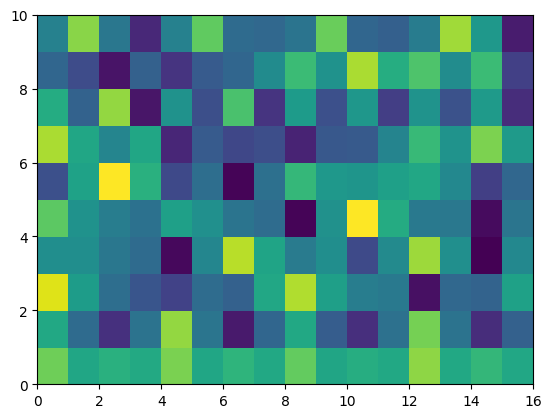

In [113]:
plt.pcolor(Extractor._stateful_extractors['percussive_beat_frames_svd'][0].components_)

In [110]:
for feat in ['harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd', 'percussive_beat_frames_svd']:
    del E_train.features[feat]
    del E_eval.features[feat]

In [112]:
E_train.soft_extract()
E_eval.soft_extract()

In [122]:
features = ['s_bpm', 'harmonic_per_freq_stats', 'percussive_per_freq_stats',
           'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames',]
           # 'percussive_beat_frames_svd']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3002504	test: 0.2920833	best: 0.2920833 (0)	total: 62.9ms	remaining: 31.4s
50:	learn: 0.6448498	test: 0.5562500	best: 0.5637500 (45)	total: 1.15s	remaining: 10.1s
100:	learn: 0.7373033	test: 0.6154167	best: 0.6179167 (98)	total: 2.13s	remaining: 8.4s
150:	learn: 0.7904149	test: 0.6387500	best: 0.6387500 (150)	total: 3.14s	remaining: 7.25s
200:	learn: 0.8260014	test: 0.6670833	best: 0.6670833 (200)	total: 4.32s	remaining: 6.42s
250:	learn: 0.8524678	test: 0.6704167	best: 0.6750000 (231)	total: 5.45s	remaining: 5.4s
300:	learn: 0.8746423	test: 0.6841667	best: 0.6841667 (300)	total: 6.46s	remaining: 4.27s
350:	learn: 0.8875179	test: 0.6920833	best: 0.6975000 (344)	total: 7.42s	remaining: 3.15s
400:	learn: 0.9043276	test: 0.7004167	best: 0.7004167 (400)	total: 8.39s	remaining: 2.07s
450:	learn: 0.9197067	test: 0.7020833	best: 0.7062500 (419)	total: 9.35s	remaining: 1.02s
499:	learn: 0.9290057	test: 0.7050000	best: 0.7062500 (419)	total: 10.4s	remaining: 0us

bestTest = 0.70625


In [70]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
harmonic_per_freq_var_svd_0,2.906287
percussive_beat_frames_svd_1,2.632563
percussive_per_freq_var_svd_0,2.473094
percussive_per_freq_stats_14,2.404642
percussive_per_freq_stats_100,1.548014
percussive_per_freq_stats_103,1.488912
mfcc_quef_stats_15,1.484657
s_bpm_0,1.319112
harmonic_per_freq_stats_83,1.311456
mfcc_quef_stats_18,1.304437


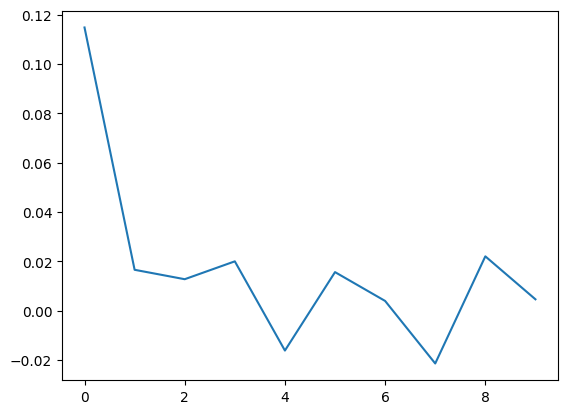

In [78]:
plt.plot(E_eval.features['percussive_beat_frames_svd'][0])

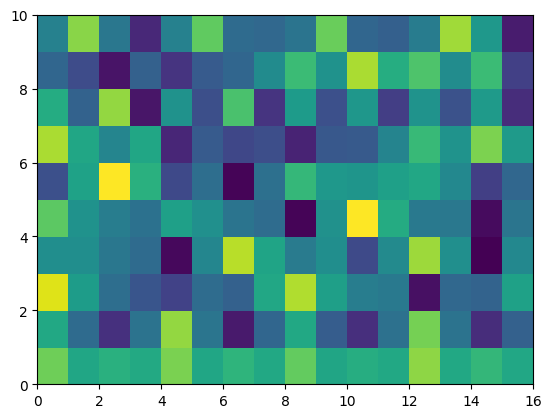

In [82]:
plt.pcolor(Extractor._stateful_extractors['percussive_beat_frames_svd'][0].components_)